In [5]:
%config IPCompleter.greedy=True

<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>
# Deep Learning for Image Classification Assessment


Welcome to your assessment! Follow the instructions in bold below to complete the assessment.

If you get stuck, check out the solutions video and notebook. (Make sure to run the solutions notebook before posting a question to the QA forum please, thanks!)

------------

## The Challenge: input (28,28,1)

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  2


## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [8]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


In [9]:
data_dict = {'x_train' : x_train, 'y_train' :y_train, 'x_test' : x_test, 'y_test' : y_test}
[print(f" {k} : {v.shape}")for k,v in data_dict.items() ]

 x_train : (60000, 28, 28)
 y_train : (60000,)
 x_test : (10000, 28, 28)
 y_test : (10000,)


[None, None, None, None]

## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [10]:
single_image = x_train[0]
print(single_image.shape)
single_image

(28, 28)


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

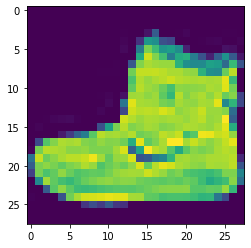

In [11]:
plt.imshow(single_image) #(28,28)

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [12]:
print(type(single_image))
single_image.max() #ndarray.max()

<class 'numpy.ndarray'>


255

In [13]:
x_train = x_train/255
x_test = x_test/255

In [14]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [15]:
x_train.shape

(60000, 28, 28)

In [16]:
x_train = x_train.reshape(60000,28,28,1)
# x_train = x_train.reshape(:, None)

In [17]:
x_test.shape

(10000, 28, 28)

In [18]:
x_test = x_test.reshape(10000,28,28,1) #channel 1 -> gray scale

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [19]:
from keras.utils import to_categorical

In [20]:
y_train_cat = to_categorical(y_train)
y_train_cat

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
y_test_cat = to_categorical(y_test)
y_test_cat

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Channel, Filter, Kernel 
###  Channel : In practicality, most input images have 3 channels(RGB), and that number only increases the deeper you go into a network. It’s pretty easy to think of channels, in general, as being a “view” of the image as a whole, emphasising some aspects, de-emphasising others.[(Reference : Irhum Shafkat)](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1)
![channel1](channel1.jpeg)
* Most of the time, we deal with RGB images with three channels. [ (Photo by Andre Mouton) ](https://unsplash.com/photos/_d3sppFprWI) 

###  A filter: A collection of kernels, in case of multiple channels
![channel](channel.png)
*  whereas in the 1 channel case, where the term filter and kernel are interchangeable,

##  Each filter in a convolution layer produces one and only one output channel.
1. Each of the kernels of the filter “slides” over their respective input channels, producing a processed version of each. Some kernels may have stronger weights than others, to give more emphasis to certain input channels than others (eg. a filter may have a red kernel channel with stronger weights than others, and hence, respond more to differences in the red channel features than the others).
![output1](output1.gif)

2. Each of the per-channel processed versions are then summed together to form one channel. The kernels of a filter each produce one version of each channel, and the filter as a whole produces one overall output channel.
![output2](output2.gif)

3.  Finally, then there’s the bias term. The way the bias term works here is that each output filter has one bias term. The bias gets added to the output channel so far to produce the final output channel.
![output3](output3.gif)

## 2D(7x7) input matrix with 3 channels (RGB) - each filter consists of 3 kernels( A filter is a collection of 3 kernels)

### * Each filter actually happens to be a collection of kernels, with there being one kernel for every single input channel to the layer, and each kernel being unique.
#### * Whereas in the 1 channel case, where the term filter and kernel are interchangeable.
![filter](filter.png)

### In case of CNN layer
[cnn basic Irhum Shafkat](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1)
* <span style="color:red"> **kernel**</span>, __*(3,3) matrix of weights*__ with only <span style="color:red">9 parameters</span> for CNN
```
[[0,1,2],
 [2,2,0],
 [0,1,2]]      
```
“slides” over the __*2D input data(5,5 matrix)*__,``With stride =1 and valid padding(no padding)``, performing an elementwise multiplication with the part of the input it is currently on, and then summing up the results into a single output pixel. __*Output (3,3) matrix*__.

* Convolutions allow us to do this transformation with only 9 parameters, with each output feature, instead of “looking at” every input feature, only getting to “look” at input features coming from roughly the same location. 

![kernel_slide](kernel_slide.gif)
* The kernel repeats this process for every location it slides over, converting a 2D matrix of features into yet another 2D matrix of features. 
* The output features are essentially, the weighted sums (with the weights being the values of the kernel itself) of the input features located roughly in the same location of the output pixel on the input layer.

###  In case of standard fully connected layer
* 5×5=25 input features, weight matrix 25x9= 225 ,which is kernel in cnn layer, and 3×3=9 output features
* We need weight matrix of 25×9 = <span style="color:red">225 parameters</span>, with every output feature being the weighted sum of every single input feature.

[Following contents are from the cnn artilce written by Sumit Saha
](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)


# Convolution Layer — The Kernel
###  The role of the ConvNet is to reduce the images into a form which is easier to process, without losing features which are critical for getting a good prediction.
### The Kernel shifts 9 times- convolution with same padding , zero padding with stride =1
![Image_convlovedFeature](kernel.gif)

Kernel/Filter, K = 
```
1  0  1
0  1  0
1  0  1
```
* Convoluting a 5x5x1 image with a 3x3x1 kernel to get a 3x3x1 convolved feature
* Image Dimensions = 5 (Height) x 5 (Breadth) x <span style="color:blue">1 (Number of channels, eg. RGB)</span>
In the above demonstration, the green section resembles our 5x5x1 input image, I. The element involved in carrying out the convolution operation in the first part of a Convolutional Layer is called the Kernel/Filter, K, represented in the color yellow. We have selected K as a 3x3x1 matrix.
* The Kernel shifts 9 times because of Stride Length = 1 (Non-Strided), every time performing a matrix multiplication operation between K and the portion P of the image over which the kernel is hovering.

# first instance of 'input_img * feature_k = convolved_feature'
import numpy as np
input_img = np.array(
[[1, 1, 1],
 [0, 1, 1],
 [0, 0 ,1]]
)
feature_k = np.array(
[[1, 0, 1],
 [0, 1, 0],
 [1, 0, 1]]
)
sum(sum(input_img*feature_k)) #4

![cnn operation](cnnop.gif)
* Convolution operation on a MxNx3 image matrix with a 3x3x3(width, height, channel-depth) Kernel/Filter, K,
* In the case of images with <span style="color:blue">multiple channels (e.g. RGB)</span>, the Kernel has the same depth(3) as that of the input image. Matrix Multiplication is performed between Kn(Kernel) and In(Input) stack ([K1, I1]; [K2, I2]; [K3, I3]) and all the results are summed with the bias to give us a squashed one-depth channel Convoluted Feature Output.

### The objective of the Convolution Operation is to extract the high-level features such as edges, from the input image. 
* ConvNets need not be limited to only one Convolutional Layer. Conventionally, the first ConvLayer is responsible for capturing the Low-Level features such as edges, color, gradient orientation, etc. 
* With added layers, the architecture adapts to the High-Level features as well, giving us a network which has the wholesome understanding of images in the dataset, similar to how we would

[cnn padding very useful](https://deeplizard.com/learn/video/qSTv_m-KFk0)

# Padding :  
## Pad the edges with extra, “fake” pixels (usually of value 0, hence the oft-used term “zero padding”)
## The kernel when sliding can allow the original edge pixels to be at its center, while extending into the fake pixels beyond the edge, producing an output the same size as the input.
### 1. In case of without padding :  ( valid padding)- default in Conv2D

* Case1: Input(n,n): (6,6), Filter(f,f): (3,3), stride 1 => 4 by 4 matrix: (n-f+1) x (n-f+1)
![padding1](padding1.png) 
* So if you take this gray scale image.<span style="color:green">The pixel in the corner</span> will only get covers one time.(The pixels on the edge are never at the center of the kernel) but if you take <span style="color:red">the middle pixel</span> it will get covered more than once basically what does that means is we have more info on that middle pixel so these are the two main downsides([Article](https://medium.com/@ayeshmanthaperera/what-is-padding-in-cnns-71b21fb0dd7))
    * Shrinking outputs(If we start out with a 4 x 4 image, for example, then just after a convolutional layer or two, the resulting output may become almost meaningless with how small it becomes.)
    * Loosing information on corners of the image( the information around the edges of the input.)


* Case2: Input(n,n): (4,4), Filter(f,f): (3,3), stride 1 => 2 by 2 matrix: (n-f+1) x (n-f+1)
![padding1](padding1_1.png)
### To overcome this problem, we can introduce Padding to an image. (ex. same padding with zero padding)
#### With each convolutional layer, just as we define how many filters to have and the size of the filters, we can also specify whether or not to use padding.


###  2. Same padding with zero padding
* It’s an additional layer(zero-padding: symmetrically adding zeroes to the input matrix) that we can add to the border of an image.For an example see the figure below there one more layer added to the ``4*4 image`` and now it has converted in to ``6*6 image``(If zero padding = 1, there will be one pixel thick around the original image with pixel value = 0. Also stride = 1)
![padding2](padding2_1.png)
### zero-padding
    * zero-padding is a commonly used modification that allows the size of the input to be adjusted to our requirement. It is mostly used in designing the CNN layers when the dimensions of the input volume need to be preserved in the output volume.
* So now there is more frame that covers the edge pixels of an image
* The kernel(Filter,matrix of weights) when sliding can allow the original edge pixels to be at its center, while extending into the fake pixels(value 0) beyond the edge, producing an output the same size as the input.

### padding test
* x: input image of shape [2, 3], 1 channel
* valid_pad: max pool with 2x2 kernel, stride 2 and VALID padding.
* same_pad: max pool with 2x2 kernel, stride 2 and SAME padding (this is the classic way to go)

#### The output shapes are:
* valid_pad: here, no padding so the output shape is [1, 1]
* same_pad: here, we pad the image to the shape [2, 4] (with -inf and then apply max pool), so the output shape is [1, 2]

# Padding: same(padding) vs. valid(no padding)
* When stride is 1 (more typical with convolution than pooling), we can think of the following distinction:

* "SAME": output size is the same as input size. This requires the filter window to slip outside input map, hence the need to pad.
* "VALID": Filter window stays at valid position inside input map, so output size shrinks by filter_size - 1. No padding occurs.

## 1. Same padding (with zero padding)
### 1)  Same Padding:   the dimensionality is either increased or remains the same through covolution operation
* When we augment the 5x5x1 image into a 7x7x1 image with <span style="color:red">0(zero) added ouside</span> and then apply the 3x3x1 kernel over it, we find that the convolved matrix turns out to be of dimensions 5x5x1. <span style="color:red">striding = 1</span>
![same padding](samepadding.gif)

### 2)  Striding = 2  :  convolved feature is reduced in dimensionality, enen though same padding
* As for 5x5x1 input image if we perform with kernel(3x3x1), striding =2 with the same padding, output matrix dimensions is decreased to (3x3x1). <span style="color:red">striding = 2</span>

![valid padding](validpadding.gif)

## 2. Valid paddding( no padding) - default in Conv2D
### Valid Padding(no padding) :  convolved feature is reduced in dimensionality as compared to the input through covolution operation
* As for 5x5x1 input image if we perform with kernel(3x3x1), striding =1 with the valid padding(no padding), we are presented matrix with a reduced dimension same as the Kernel (3x3x1) itself. <span style="color:red">striding = 1</span>

* As for 5x5x1 input image if we perform with kernel(3x3x1), striding =2 with the valid padding(no padding), we are presented matrix with a reduced dimension (2x2x1). <span style="color:red">striding = 2</span>



![pad stride](padstride.png)

# Pooling Layer : Similar to the Convolutional Layer, the Pooling layer is responsible for reducing the spatial size of the Convolved Feature.
*  This is to decrease the computational power required to process the data through dimensionality reduction. Furthermore, it is useful for extracting dominant features which are rotational and positional invariant(preserve same identity, category (etc) even if ratated or position changed), thus maintaining the process of effectively training of the model.
![pooling](pooling.gif)
* Max pooling : 3x3 pooling over 5x5 convolved feature

* Max Pooling : performs as a Noise Suppressant. It discards the noisy activations altogether and also performs de-noising along with dimensionality reduction. 
* Average Pooling : simply performs dimensionality reduction as a noise suppressing mechanism. Hence, we can say that Max Pooling performs a lot better than Average Pooling.
![pooling](pooling.jpeg)

* The Convolutional Layer and the Pooling Layer, together form the i-th layer of a Convolutional Neural Network. 

*  Often when running a convolution layer, you want an output with a lower size than the input. This is commonplace in convolutional neural networks, where the size of the spatial dimensions are reduced when increasing the number of channels. -> 
    * striding = 2(downsizing by roughly a factor of 2), 3(downsizing roughly by factor 3) and so on. 
    * pooling(ex. max pooling)

[kernel feature size guide ](https://www.sicara.ai/blog/2019-10-31-convolutional-layer-convolution-kernel)


# Creating the Model

### Valid paddding( no padding) - default in Conv2D
* Valid Padding(no padding) : convolved feature is reduced in dimensionality as compared to the input through covolution operation¶
* As for 28x128x1 input image if we perform with kernel(3x3) and 32 filters(3x3x3), striding =1 with the valid padding(no padding), we are presented matrix with a reduced dimension (128, 128, 32) <- 130 - 3 + 1 = 128. striding = 1

### 2D(28x28) input matrix with 1 channel(grayscale) - filter is a kernel 
#### Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',)
* Input volume (28x28x1) x[:,:,0]
* Filter(32 Filters), Bias(32 Bias)
    * Filter w0(3x3x1)-w0[:,:,0] , Bias b0(1x1x1)-b0[:,:,0]
    * Filter w1(3x3x1)-w1[:,:,0] , Bias b1(1x1x1)-b0[:,:,0]
    * Filter w2(3x3x1)-w2[:,:,0] , Bias b2(1x1x1)-b0[:,:,0]
    * ....
    * Filter w31(3x3x1)-w31[:,:,0] , Bias b31(1x1x1)-b0[:,:,0]
* kernel(3,3) matrix of weights with only 9 parameters for CNN slides over the 2D input data(28,28 matrix)
with stride =1 and valid padding(no padding).
    * 28 - 3 + 1 = 26 (Input shape(28x28), Filter shape(3x3) with 32 filters, Output shape(26x26))
    * **output shape -> (,26,26,32)**

#### MaxPool2D(pool_size=(2, 2))
* pool size(2,2), stride=2 stride over (26,26) -> 26/2 => 13
* **output shape -> (,13,13,32)**

#### Flatten()
* 13x13x32 -> **output(,5408)**

#### Dense(128, activation='relu')
* 128 neurons hidden layer -> **output (,128)**

#### Dense(10, activation='softmax')
* classifier with 10 classes -> **output (,10)**

## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

### compile: 
we want to decide a model architecture, this is the number of hidden layers and activation functions, etc. 
The compilation steps also asks you to define the loss function and kind of optimizer you want to use

In [23]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
#               optimizer='rmsprop',
              optimizer='adam',
              metrics=['accuracy']) #'mse' for regression

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [25]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_loss', patience=2)

 ### fit:
 we need to train our model so that the parameters get tuned to provide the correct outputs for a given input. We do this by feeding inputs at the input layer and then getting an output, we then calculate the loss function using the output and use backpropagation to tune the model parameters. This will **fit** the model parameters to the data.
 [compile fit predict examples](https://datascience.stackexchange.com/questions/46124/what-do-compile-fit-and-predict-do-in-keras-sequential-models)

In [26]:
model.fit(x_train, y_train_cat, epochs=20, validation_data=(x_test, y_test_cat), callbacks=[earlystop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 144us/sample - loss: 0.3944 - accuracy: 0.8589 - val_loss: 0.3226 - val_accuracy: 0.8823
Epoch 2/20
60000/60000 [==============================] - 7s 119us/sample - loss: 0.2697 - accuracy: 0.9019 - val_loss: 0.2761 - val_accuracy: 0.8989
Epoch 3/20
60000/60000 [==============================] - 7s 119us/sample - loss: 0.2253 - accuracy: 0.9176 - val_loss: 0.2774 - val_accuracy: 0.8968
Epoch 4/20
60000/60000 [==============================] - 7s 119us/sample - loss: 0.1927 - accuracy: 0.9291 - val_loss: 0.2548 - val_accuracy: 0.9083
Epoch 5/20
60000/60000 [==============================] - 7s 115us/sample - loss: 0.1662 - accuracy: 0.9376 - val_loss: 0.2472 - val_accuracy: 0.9137
Epoch 6/20
60000/60000 [==============================] - 7s 116us/sample - loss: 0.1442 - accuracy: 0.9467 - val_loss: 0.2576 - val_accuracy: 0.9120
Epoch 7/20
60000/60000 [==========================

### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [27]:
model.metrics_names

['loss', 'accuracy']

In [28]:
model.history

In [29]:
model.history.history

{'loss': [0.39443360428412755,
  0.2697416810631752,
  0.22528006603916487,
  0.19269870396256447,
  0.16618558723181487,
  0.14419147512714067,
  0.1227092637921373],
 'accuracy': [0.8588667,
  0.9018833,
  0.91761667,
  0.9291,
  0.93763334,
  0.9467,
  0.9536333],
 'val_loss': [0.32260251232385634,
  0.2760717653989792,
  0.2773921070337296,
  0.25476971052885056,
  0.24715050470232963,
  0.25761024999022486,
  0.2706335971802473],
 'val_accuracy': [0.8823, 0.8989, 0.8968, 0.9083, 0.9137, 0.912, 0.9143]}

In [30]:
history = pd.DataFrame(model.history.history)
history

,loss,accuracy,val_loss,val_accuracy
0,0.394434,0.858867,0.322603,0.8823
1,0.269742,0.901883,0.276072,0.8989
2,0.225280,0.917617,0.277392,0.8968
3,0.192699,0.929100,0.254770,0.9083
4,0.166186,0.937633,0.247151,0.9137
5,0.144191,0.946700,0.257610,0.9120
6,0.122709,0.953633,0.270634,0.9143


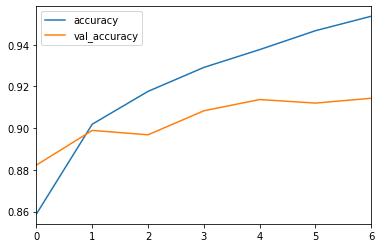

In [31]:
history[['accuracy','val_accuracy']].plot()

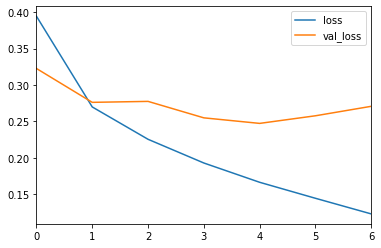

In [32]:
history[['loss','val_loss']].plot()

In [33]:
print(model.metrics_names)

['loss', 'accuracy']


#### model.evaluate
Returns the loss value & metrics values for the model in test mode.

In [34]:
model.evaluate(x_test,y_test_cat, verbose=0)

[0.2706335971802473, 0.9143]

In [35]:
from sklearn.metrics import classification_report

Now we have a model architecture and we have a file containing all the model parameters with the best values found to map the inputs to an output.

#### predict : use this model to do some feed-forward passes to predict novel inputs. (predict)
#### predict_classes

In [36]:
#option1 : model.predict
predictions1 = model.predict(x_test)

In [37]:
print(predictions1.shape)
predictions1

(10000, 10)


array([[3.8469178e-05, 3.1430306e-11, 2.5565068e-05, ..., 2.7824477e-03,
        4.4110152e-06, 9.9694532e-01],
       [4.9970595e-06, 5.3750620e-14, 9.9997640e-01, ..., 2.6371180e-17,
        2.3426369e-12, 2.1390837e-18],
       [3.2375143e-09, 1.0000000e+00, 6.6519398e-12, ..., 1.2436848e-15,
        1.7728138e-13, 1.0065021e-15],
       ...,
       [1.1257185e-09, 9.8589912e-12, 5.6545855e-07, ..., 4.0240110e-08,
        9.9998367e-01, 5.0982296e-12],
       [1.5822638e-09, 9.9999690e-01, 3.1873523e-10, ..., 1.5506406e-15,
        2.8363024e-13, 9.6761037e-12],
       [1.9172861e-05, 4.4205159e-08, 2.6065869e-05, ..., 1.2427149e-02,
        4.8612562e-04, 7.0619171e-06]], dtype=float32)

In [45]:
len([ np.argmax(x) for x in predictions1])

10000

In [48]:
[np.argmax(x) for x in predictions1][:10]

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7]

In [38]:
#option2 : model.predict_classes
predictions = model.predict_classes(x_test)
predictions.shape

(10000,)

In [47]:
predictions[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [80]:
print(y_test.shape)
y_test

(10000,)


array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [79]:
print(y_test_cat.shape)
y_test_cat

(10000, 10)


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

![precision_reacall](precision_recall.png)

* precision = tp / (tp + fp) 
* recall = tp / (tp + fn) 

In [82]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1000
           1       0.99      0.99      0.99      1000
           2       0.92      0.80      0.86      1000
           3       0.93      0.90      0.91      1000
           4       0.80      0.93      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.77      0.75      0.76      1000
           7       0.94      0.98      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



# Great Job!